In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/ubuntu/sustaingym


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
from stable_baselines3 import PPO, DQN

from stable_baselines3.common.callbacks import EvalCallback, CallbackList
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv

from sustaingym.algorithms.evcharging.base_algorithm import SelectiveChargingAlgorithm, GreedyAlgorithm, PPOAlgorithm, RandomAlgorithm
from sustaingym.envs.evcharging import EVChargingEnv, RealTraceGenerator, GMMsTraceGenerator, DEFAULT_PERIOD_TO_RANGE

import pandas as pd

<AxesSubplot:>

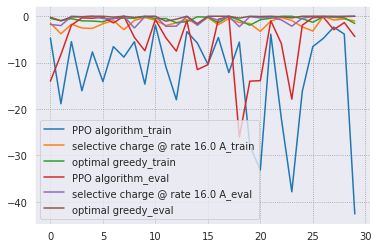

In [6]:
df = pd.read_csv('logs/exp_1/results.csv')
pd.set_option('precision', 2)
df.plot()

<AxesSubplot:>

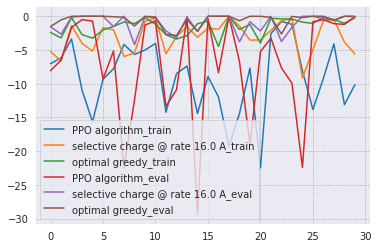

In [8]:
df = pd.read_csv('logs/exp_2/results.csv')
pd.set_option('precision', 2)
df.plot()

<AxesSubplot:>

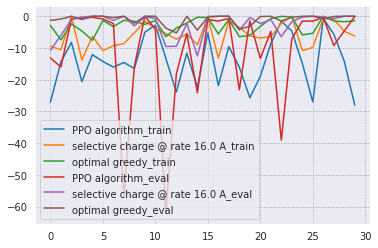

In [9]:
df = pd.read_csv('logs/exp_3/results.csv')
pd.set_option('precision', 2)
df.plot()

In [11]:
from sustaingym.load_moer import *
from datetime import datetime

starttime = datetime(2019, 5, 3)
endtime = datetime(2019, 7, 3)
ba = 'SGIP_CAISO_PGE'
save_dir = 'sustaingym/data/moer_data'

df = load_moer(starttime, endtime, ba, save_dir)

In [34]:
maximum, minimum = 0., 1.
for csv_file in os.listdir(save_dir):
    df = pd.read_csv(os.path.join(save_dir, csv_file),
                         compression=COMPRESSION,
                         index_col=INDEX_NAME)
    maximum = max(maximum, max(df.max()))
    minimum = min(minimum, min(df.min()))
maximum, minimum

(0.6684217264340985, 0.0)

In [ ]:
# find max value of moer
    file_name = FNAME_FORMAT_STR.format(ba=ba, year=year, month=month)
    file_path = os.path.join(save_dir, file_name)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path,
                         compression=COMPRESSION,
                         index_col=INDEX_NAME)

In [12]:
df.head()

,moer,forecast
time,,
2019-08-01 00:00:00+00:00,0.29,0.32
2019-07-31 23:55:00+00:00,0.33,0.34
2019-07-31 23:50:00+00:00,0.35,0.36
2019-07-31 23:45:00+00:00,0.35,0.37
2019-07-31 23:40:00+00:00,0.35,0.37


In [13]:
df.index

DatetimeIndex(['2019-08-01 00:00:00+00:00', '2019-07-31 23:55:00+00:00',
               '2019-07-31 23:50:00+00:00', '2019-07-31 23:45:00+00:00',
               '2019-07-31 23:40:00+00:00', '2019-07-31 23:35:00+00:00',
               '2019-07-31 23:30:00+00:00', '2019-07-31 23:25:00+00:00',
               '2019-07-31 23:20:00+00:00', '2019-07-31 23:15:00+00:00',
               ...
               '2019-04-30 00:45:00+00:00', '2019-04-30 00:40:00+00:00',
               '2019-04-30 00:35:00+00:00', '2019-04-30 00:30:00+00:00',
               '2019-04-30 00:25:00+00:00', '2019-04-30 00:20:00+00:00',
               '2019-04-30 00:15:00+00:00', '2019-04-30 00:10:00+00:00',
               '2019-04-30 00:05:00+00:00', '2019-04-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=26785, freq=None)

In [27]:
import pytz
pac = pytz.timezone('US/Pacific')

intervalstart = datetime(2019, 6, 2, 0, 0, 0, tzinfo=pac)
intervalend = datetime(2019, 6, 3, 0, 0, 0, tzinfo=pac)
df[(intervalstart <= df.index) & (df.index < intervalend)].values.shape

(288, 2)